# Lab 4 – Doing regression.  
Here is what we will do: 
1. Prepare the data 
2. Train and analyze a linear regression - single input feature - multiple input features 
3. Train and analyze a polynomial regression 
4. Train and analyze a regularized model 

### Prepare the Data 

In [8]:
# third cell -
import pandas as pd
howell_full = pd.read_csv("Howell.csv", sep=";")
# Compute bmi based on height and weight metric units
def bmi(height, weight):
    return 10000*weight/(height**2)

#print(bmi(150, 40))
new_feature = bmi(howell_full['height'], howell_full['weight'])
#print(new_feature)
howell_full['bmi'] = new_feature
howell_full.head(n=10)
import numpy as np
def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'
vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])
#print(howell_full.head(n=10))
howell_full['bmi class'].value_counts()


bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

### Quick look at distributions:

In [5]:
howell_full.corr()

,height,weight,age,male
height,1.000000,0.940822,0.683689,0.139229
weight,0.940822,1.000000,0.678335,0.155443
age,0.683689,0.678335,1.000000,0.005887
male,0.139229,0.155443,0.005887,1.000000


### A Better Plot

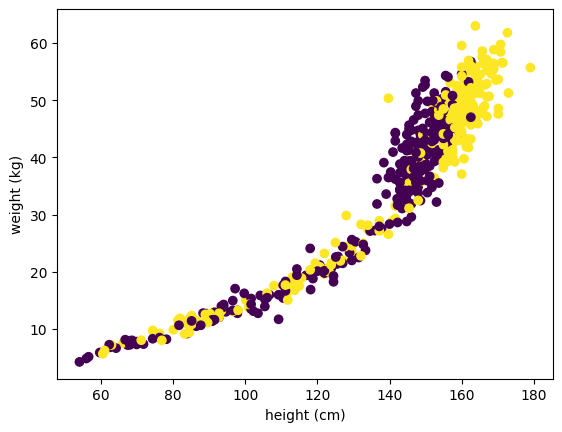

In [6]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']
#plt.scatter(height, weight)
#plt.xlabel('height (cm)')
#plt.ylabel('weight (kg)')
#plt.show()

gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

#age = howell_full['age']
#plt.scatter(age, height, c=gender)
#plt.xlabel('age (years)')
#plt.ylabel('height (cm)')
#plt.show()




### Handling Missing Data
In our case we have no missing data, so the code here is just for reference.

In [6]:
# create a new feature with the name new
howell_full['new'] = howell_full['male'] + howell_full['age']
howell_full.info()

# get rid of the new feature
howell_full.drop(axis='columns', labels='new', inplace=True)
howell_full.info()

# remove rows that are missing values
howell_full.dropna(axis='index', how="any", inplace=True)

height_median = howell_full['height'].median()
weight_average = howell_full['weight'].mean()

# replace missing values by median or average (or any arbitrary value)
howell_full['height'].fillna(height_median, inplace=True)
howell_full['weight'].fillna(weight_average, inplace=True)
howell_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
 4   new     544 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 21.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    fl

### Adding a New Feature

In [7]:
# Compute bmi based on height and weight metric units
def bmi(height, weight):
    return 10000*weight/(height**2)

#print(bmi(150, 40))
new_feature = bmi(howell_full['height'], howell_full['weight'])
#print(new_feature)
howell_full['bmi'] = new_feature
howell_full.head(n=10)



17.77777777777778
0      20.764297
1      18.695244
2      17.095718
3      21.561444
4      19.520384
         ...    
539    14.720729
540    19.739486
541    22.155341
542    15.917698
543    20.844590
Length: 544, dtype: float64


,height,weight,age,male,bmi
0,151.765,47.825606,63.0,1,20.764297
1,139.700,36.485807,63.0,0,18.695244
2,136.525,31.864838,65.0,0,17.095718
3,156.845,53.041915,41.0,1,21.561444
4,145.415,41.276872,51.0,0,19.520384
5,163.830,62.992589,35.0,1,23.469433
6,149.225,38.243476,32.0,0,17.174108
7,168.910,55.479971,27.0,1,19.445786
8,147.955,34.869885,19.0,0,15.929099
9,165.100,54.487739,54.0,1,19.989625


### Creating a categorical feature
When doing a stratefied sampling, we need a feature that is categorical.  In other words, a feature that has a limited number of values. BMI is continuous.  We probably do not have very many instances that share the same BMI.  BMI already has some arbitraily determined categories:
    - Underweight less than 18.5
    - Normal range of 18.5 to 25.0
    - Overwieght range of 25.0 to 30.0
    - Obese greater than 30
    
Unlike the BMI function, IF does not get applied across an array, so we need to create a version of the function that will.

In [8]:
import numpy as np

def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])

#print(howell_full.head(n=10))

howell_full['bmi class'].value_counts()

    height     weight   age  male        bmi    bmi class
0  151.765  47.825606  63.0     1  20.764297       Normal
1  139.700  36.485807  63.0     0  18.695244       Normal
2  136.525  31.864838  65.0     0  17.095718  Underweight
3  156.845  53.041915  41.0     1  21.561444       Normal
4  145.415  41.276872  51.0     0  19.520384       Normal
5  163.830  62.992589  35.0     1  23.469433       Normal
6  149.225  38.243476  32.0     0  17.174108  Underweight
7  168.910  55.479971  27.0     1  19.445786       Normal
8  147.955  34.869885  19.0     0  15.929099  Underweight
9  165.100  54.487739  54.0     1  19.989625       Normal


Underweight    341
Normal         202
Overweight       1
Name: bmi class, dtype: int64

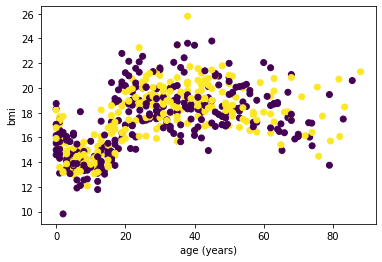

In [9]:
import matplotlib.pyplot as plt

age = howell_full['age']
bmi = howell_full['bmi']
gender = howell_full['male']
plt.scatter(age, bmi, c=gender)
plt.xlabel('age (years)')
plt.ylabel('bmi')
plt.show()

### Train/Test Data Split

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(howell_full, 
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  435 Test size:  109


### Train and evaluate a Linear Regression Model 

In [13]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
X = train_set[['height']] 
y = train_set['weight'] 
X_test = test_set[['height']] 
y_test = test_set['weight'] 
lr_model = LinearRegression() 
lr_model.fit(X,y) 
y_pred = lr_model.predict(X) 
print('Results for linear regression on training data') 
print('  Default settings') 
print('Internal parameters:') 
print('   Bias is ', lr_model.intercept_) 
print('   Coefficients', lr_model.coef_) 
print('   Score', lr_model.score(X,y)) 
print('MAE is  ', mean_absolute_error(y, y_pred)) 
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred))) 
print('MSE is ', mean_squared_error(y, y_pred)) 
print('R^2    ', r2_score(y,y_pred)) 
y_test_pred = lr_model.predict(X_test) 
print() 
print('Results for linear regression on test data') 
print('MAE is  ', mean_absolute_error(y_test, y_test_pred)) 
print('RMSE is ', np.sqrt(mean_squared_error(y_test, 
y_test_pred))) 
print('MSE is ', mean_squared_error(y_test, y_test_pred)) 
print('R^2    ', r2_score(y_test,y_test_pred)) 

Results for linear regression on training data
  Default settings
Internal parameters:
   Bias is  -34.33484184267892
   Coefficients [0.50625269]
   Score 0.8892970528522413
MAE is   3.986801374333733
RMSE is  4.901419255121661
MSE is  24.02391071447738
R^2     0.8892970528522413

Results for linear regression on test data
MAE is   4.268058841968444
RMSE is  5.308233145876227
MSE is  28.177339130979025
R^2     0.8677460846087206


# Results 
Basic results for our regression models to predict weight on 
the Howell data. 
| Model | Training Features | Set | RMSE | R2 | 
|:---|:---|:---|:---|:---| 
|Linear Regression|Height|Training|4.90|88.93| 
|Linear Regression|Height|Test|5.31|86.77|
|Linear Regression|Height,Age|Training|4.88|89.04| 
|Linear Regression|Height,Age|Test|5.18|87.39| 
|Polynomial Regression degree 3|Height|Training|3.82|83.28| 
|Polynomial Regression degree 3|Height|Test|4.31|91.30| 
|Polynomial Regression degree 8|Height|Training|3.67|93.79| 
|Polynomial Regression degree 8|Height|Test|4.26|91.50| 
|Elastic Net degree 8|Height|Training|3.76|93.49| 
|Elastic Net degree 8|Height|Test|4.22|91.66| 

### Plot linear regression model 
Using height to predict weight 

C:\Users\habto\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


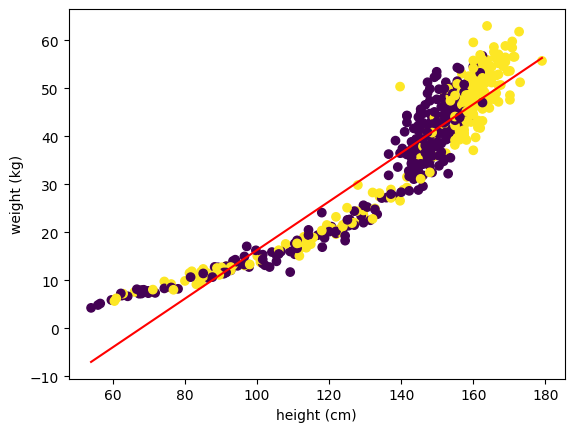

bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']

gender = howell_full['male']
min_height = height.min() 
max_height = height.max() 
points = 200 
step_by = (max_height - min_height)/(points-1)

x_values = [min_height + i*step_by for i in range(0, points)] 
inputs = [[x] for x in x_values] 
y_values = lr_model.predict(inputs) 

plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.plot(x_values, y_values, c='red')
plt.show()
import numpy as np

def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])

#print(howell_full.head(n=10))

howell_full['bmi class'].value_counts()


### Add a Feature to the Model

In [17]:

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
#X = train_set[['height']] 
#y = train_set['weight'] 

X = train_set[['height', 'age']] 
y = train_set['weight'] 

#X_test = test_set[['height']] 
#y_test = test_set['weight'] 

X_test = test_set[['height', 'age']] 
y_test = test_set['weight'] 

lr_model = LinearRegression() 
lr_model.fit(X,y) 
y_pred = lr_model.predict(X) 
print('Results for linear regression on training data') 
print('  Default settings') 
print('Internal parameters:') 
print('   Bias is ', lr_model.intercept_) 
print('   Coefficients', lr_model.coef_) 
print('   Score', lr_model.score(X,y)) 
print('MAE is  ', mean_absolute_error(y, y_pred)) 
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred))) 
print('MSE is ', mean_squared_error(y, y_pred)) 
print('R^2    ', r2_score(y,y_pred)) 
y_test_pred = lr_model.predict(X_test) 
print() 
print('Results for linear regression on test data') 
print('MAE is  ', mean_absolute_error(y_test, y_test_pred)) 
print('RMSE is ', np.sqrt(mean_squared_error(y_test, 
y_test_pred))) 
print('MSE is ', mean_squared_error(y_test, y_test_pred)) 
print('R^2    ', r2_score(y_test,y_test_pred)) 

print('Results for linear regression on training data') 
print('Input: Height, age') 

print('Results for linear regression on test data') 
print('Input: Height, age') 


Results for linear regression on training data
  Default settings
Internal parameters:
   Bias is  -32.981786351678274
   Coefficients [0.48959129 0.03198353]
   Score 0.8903963296817052
MAE is   3.9844579179380495
RMSE is  4.877023070139708
MSE is  23.78535402667494
R^2     0.8903963296817052

Results for linear regression on test data
MAE is   4.1967168519461024
RMSE is  5.183466125624854
MSE is  26.868321075500337
R^2     0.8738901268956872
Results for linear regression on training data
Input: Height, age
Results for linear regression on test data
Input: Height, age


### Use Polynomial Regression 

In [18]:
from sklearn.preprocessing import PolynomialFeatures 
power = 3 
poly_process = PolynomialFeatures(degree=power, include_bias=False) 

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
#X = train_set[['height']] 
#y = train_set['weight'] 

X = train_set[['height']] 
y = train_set['weight'] 
X_poly = poly_process.fit_transform(X) 

#X_test = test_set[['height']] 
#y_test = test_set['weight'] 

X_test = test_set[['height']] 
y_test = test_set['weight'] 
X_poly_test = poly_process.fit_transform(X_test) 

lr_model = LinearRegression() 
lr_model.fit(X_poly,y) 
y_pred = lr_model.predict(X_poly) 
print('Results for linear regression on training data') 
print('Polynomial regression with degree ', power) 
print('  Default settings') 
print('Internal parameters:') 
print('   Bias is ', lr_model.intercept_) 
print('   Coefficients', lr_model.coef_) 
print('   Score', lr_model.score(X_poly,y)) 
print('MAE is  ', mean_absolute_error(y, y_pred)) 
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred))) 
print('MSE is ', mean_squared_error(y, y_pred)) 
print('R^2    ', r2_score(y,y_pred)) 
y_test_pred = lr_model.predict(X_poly_test) 
print() 
print('Results for linear regression on test data') 
print('MAE is  ', mean_absolute_error(y_test, y_test_pred)) 
print('RMSE is ', np.sqrt(mean_squared_error(y_test, 
y_test_pred))) 
print('MSE is ', mean_squared_error(y_test, y_test_pred)) 
print('R^2    ', r2_score(y_test,y_test_pred)) 

print('Results for linear regression on training data') 
print('Input: Height, age') 

print('Results for linear regression on test data') 
print('Input: Height, age') 


Results for linear regression on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
   Bias is  38.75567249133156
   Coefficients [-9.68874202e-01  8.36011255e-03 -1.20345929e-05]
   Score 0.9327619061923518
MAE is   2.920844364667155
RMSE is  3.8198820894680785
MSE is  14.591499177439013
R^2     0.9327619061923518

Results for linear regression on test data
MAE is   3.292941894856223
RMSE is  4.305579019074091
MSE is  18.53801068949101
R^2     0.9129894953581662
Results for linear regression on training data
Input: Height, age
Results for linear regression on test data
Input: Height, age


### Polynomial Regress Graph

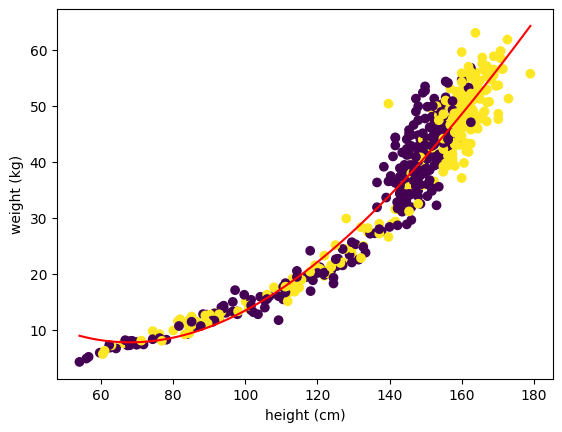

bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']

gender = howell_full['male']
min_height = height.min() 
max_height = height.max() 
points = 200 
step_by = (max_height - min_height)/(points-1)

x_values = [min_height + i*step_by for i in range(0, points)] 
inputs = [[x] for x in x_values] 
inputs_poly = poly_process.fit_transform(inputs) 
y_values = lr_model.predict(inputs_poly) 

plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.plot(x_values, y_values, c='red')
plt.show()
import numpy as np

def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])

#print(howell_full.head(n=10))

howell_full['bmi class'].value_counts()


Results for linear regression on training data
Polynomial regression with degree  8
  Default settings
Internal parameters:
   Bias is  30.632150668554452
   Coefficients [-1.05825235e-06 -5.77555995e-05 -1.70151548e-03  6.23669326e-05
 -9.32833185e-07  7.00950140e-09 -2.62051349e-11  3.88237018e-14]
   Score 0.9379323667737994
MAE is   2.6922506789766354
RMSE is  3.670074275700648
MSE is  13.469445189159636
R^2     0.9379323667737994

Results for linear regression on test data
MAE is   3.1026187186322485
RMSE is  4.257704369253435
MSE is  18.128046495959794
R^2     0.9149137143027832
Results for linear regression on training data
Input: Height, age
Results for linear regression on test data
Input: Height, age


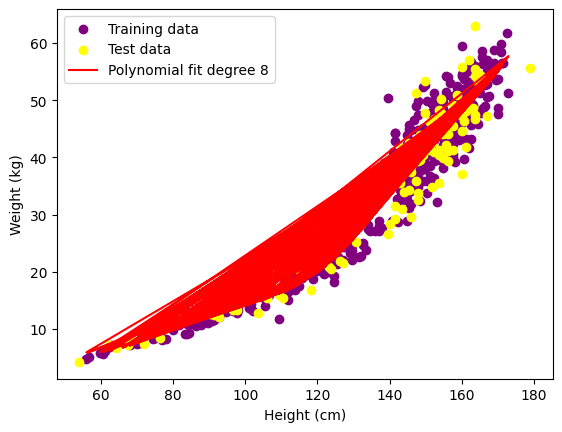

In [21]:
from sklearn.preprocessing import PolynomialFeatures 
power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False) 

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
#X = train_set[['height']] 
#y = train_set['weight'] 

X = train_set[['height']] 
y = train_set['weight'] 
X_poly = poly_process.fit_transform(X) 

#X_test = test_set[['height']] 
#y_test = test_set['weight'] 

X_test = test_set[['height']] 
y_test = test_set['weight'] 
X_poly_test = poly_process.fit_transform(X_test) 

lr_model = LinearRegression() 
lr_model.fit(X_poly,y) 
y_pred = lr_model.predict(X_poly) 
print('Results for linear regression on training data') 
print('Polynomial regression with degree ', power) 
print('  Default settings') 
print('Internal parameters:') 
print('   Bias is ', lr_model.intercept_) 
print('   Coefficients', lr_model.coef_) 
print('   Score', lr_model.score(X_poly,y)) 
print('MAE is  ', mean_absolute_error(y, y_pred)) 
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred))) 
print('MSE is ', mean_squared_error(y, y_pred)) 
print('R^2    ', r2_score(y,y_pred)) 
y_test_pred = lr_model.predict(X_poly_test) 
print() 
print('Results for linear regression on test data') 
print('MAE is  ', mean_absolute_error(y_test, y_test_pred)) 
print('RMSE is ', np.sqrt(mean_squared_error(y_test, 
y_test_pred))) 
print('MSE is ', mean_squared_error(y_test, y_test_pred)) 
print('R^2    ', r2_score(y_test,y_test_pred)) 

print('Results for linear regression on training data') 
print('Input: Height, age') 

print('Results for linear regression on test data') 
print('Input: Height, age') 

# Plotting the results
plt.scatter(X, y, color='purple', label='Training data')
plt.scatter(X_test, y_test, color='yellow', label='Test data')
plt.plot(X, y_pred, color='red', label=f'Polynomial fit degree {power}')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()


### Elastic Net with Poly Features

In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)


reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly, y)
y_pred = reg_lr_model.predict(X_poly)

print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('   Bias is ', reg_lr_model.intercept_)
print('   Coefficients', reg_lr_model.coef_)
print('   Score', reg_lr_model.score(X_poly, y))
print('MAE is  ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2    ', r2_score(y, y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)

print()
print('Results for elastic net on test data')
print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))


Results for elastic net on training data
Polynomial regression with degree  8
  Default settings
Internal parameters:
   Bias is  18.84611340392235
   Coefficients [-2.55756771e-01  6.87204298e-04  8.52528900e-06  3.67563933e-08
  1.17760939e-10  1.01431642e-13 -2.55533600e-15 -3.04757085e-17]
   Score 0.9349092303329695
MAE is   2.8731176934054687
RMSE is  3.7583910442959536
MSE is  14.125503241844028
R^2     0.9349092303329695

Results for elastic net on test data
MAE is   3.22521871336981
RMSE is  4.21639506222705
MSE is  17.77798732077265
R^2     0.9165567614450963


C:\Users\habto\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.091e+03, tolerance: 9.440e+00
  model = cd_fast.enet_coordinate_descent(


### Elastic Net Graph

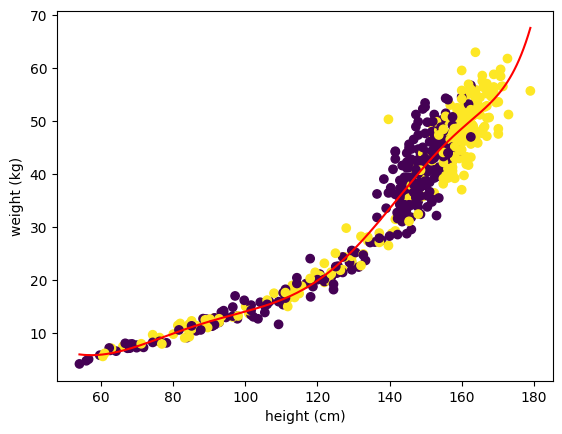

In [29]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']

gender = howell_full['male']
min_height = height.min() 
max_height = height.max() 
points = 200 
step_by = (max_height - min_height)/(points-1)

x_values = [min_height + i*step_by for i in range(0, points)] 
inputs = [[x] for x in x_values] 
inputs_poly = poly_process.fit_transform(inputs) 
y_values = lr_model.predict(inputs_poly) 

plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.plot(x_values, y_values, c='red')
plt.show()